<a href="https://colab.research.google.com/github/csislam/islam.github.io/blob/main/Summar_Research_Project_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hierarchical Spatial Algorithms for High-Resolution Image Quantization and Feature Extraction

---

**Abstract:** This study introduces a modular framework for spatial image processing, integrating grayscale quantization, color and brightness enhancement, image sharpening, bidirectional transformation pipelines, and geometric feature extraction. A stepwise intensity transformation quantizes grayscale images into eight discrete levels, producing a posterization effect that simplifies representation while preserving structural detail. Color enhancement is achieved via histogram equalization in both RGB and YCrCb color spaces, with the latter improving contrast while maintaining chrominance fidelity. Brightness adjustment is implemented through HSV value-channel manipulation, and image sharpening is performed using a $3 \times 3$ convolution kernel to enhance high-frequency details. A bidirectional transformation pipeline that integrates unsharp masking, gamma correction, and noise amplification achieved accuracy levels of 76.10\% and 74.80\% for the forward and reverse processes, respectively. Geometric feature extraction employed Canny edge detection, Hough-based line estimation (e.g., 51.50° for billiard cue alignment), Harris corner detection, and morphological window localization. Cue isolation further yielded 81.87\% similarity against ground truth images. Experimental evaluation across diverse datasets demonstrates robust and deterministic performance, highlighting its potential for real-time image analysis and computer vision.

This coursework is submitted as part of the requirements for the **Advanced Topics in Image Analysis (BBL588E)** course during the Spring 2025 semester, in the **Department of Computer Science Master’s Programme at Istanbul Technical University**. The author of this project is **Noor Islam S. Mohammad (SID: 704231023).** The notebook was executed in **Kaggle**, so please consider this if rerunning any parts locally or in **Google Colab**. To ensure proper functionality:

1. **Run all required libraries first** (as listed in the first four code cells), otherwise instances of `matplotlib` or other dependencies may not work correctly.
2. **Execute cells sequentially**, as many exercises depend on variables or results calculated in previous cells.

However, the following guidelines and steps will help replicate the results smoothly and avoid runtime errors.

In [ ]:
# Dependencies for rendering text of matplotlib in LaTeX
!sudo apt update -y
!sudo apt install -y cm-super dvipng texlive-latex-extra texlive-latex-recommended #texlive-full

Get:1 http://packages.cloud.google.com/apt gcsfuse-focal InRelease [5002 B]
Get:2 https://packages.cloud.google.com/apt cloud-sdk InRelease [6361 B]
Hit:3 http://archive.ubuntu.com/ubuntu focal InRelease
Get:4 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:5 http://packages.cloud.google.com/apt gcsfuse-focal/main amd64 Packages [2217 B]
Get:6 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:7 https://packages.cloud.google.com/apt cloud-sdk/main amd64 Packages [434 kB]
Get:8 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:9 http://archive.ubuntu.com/ubuntu focal-updates/multiverse amd64 Packages [31.2 kB]
Get:10 http://archive.ubuntu.com/ubuntu focal-updates/restricted amd64 Packages [2341 kB]
Get:11 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [2669 kB]
Get:12 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [1334 kB]
Get:13 http://archive.ubuntu.com/ubuntu focal-updates/

In [ ]:
# Import necessary libraries
import numpy as np
import skimage
import math
import copy
import cv2
import matplotlib.pyplot as plt
from skimage import metrics as metric
from scipy import ndimage
from math import pi, degrees
from PIL import Image, ImageStat

# Import similarity metrics
from skimage.metrics import structural_similarity as ssim
from sklearn.metrics import normalized_mutual_info_score as nmi

# Consider aesthetics and consistency
plt.rcParams.update({
        "text.usetex": True,
        "font.size": 15,
        'mathtext.default': 'regular',
        'axes.titlesize': 16,
        "axes.labelsize": 16,
        "legend.fontsize": 15,
        "xtick.labelsize": 15,
        "ytick.labelsize": 15,
        'figure.titlesize': 16,
        'figure.figsize': (12, 7),
        'text.latex.preamble': r'\usepackage{amsmath,amssymb}',
        "font.family": "serif",
        "font.serif": "computer modern roman",
        })

In [ ]:
import os
import sys

def get_data_path():
    if 'KAGGLE_KERNEL_RUN_TYPE' in os.environ: # Running on Kaggle
        return "/kaggle/input/imageanalysis-1"
    elif 'google.colab' in sys.modules: # Running on Colab
        return "/content/drive/MyDrive/imageanalysis-1"
    else:  # Running locally
        return "./imageanalysis-1"

data_path = get_data_path()
os.chdir(data_path)

## **Step 1**

a) Explain the impact of the following transformation function on a grayscale image, in terms of intensity values and brightness.

b) Verify your answer by a applying the transformation on an image of your choice (include input/output images in your answer).

### A
The trasnformation depicted on the plot is a stepwise-intensity transformation to a grayscale input image, essentially quantising the pixel intensities into 8 levels (as many as the distinct flat regions in the function graph). An image that undergoes that transformation function will only have 8 different shades of grey in the output creating, therefore, a more stylised (or posterised) version of the image by reducing the number of unique intensity levels.Furthermore, due to the flat regions of the function not being equal in width some shades of gray will be represented more in the output, however this also depends on the initial distribution of the intensity values of the image. For example, if a pixel intensity is between 30 and 60, it will be assigned the value 20 in the transformed image. This step-transformation reduces the overall number of intensity levels in the image, creating a more simplified or posterized appearance.

### B

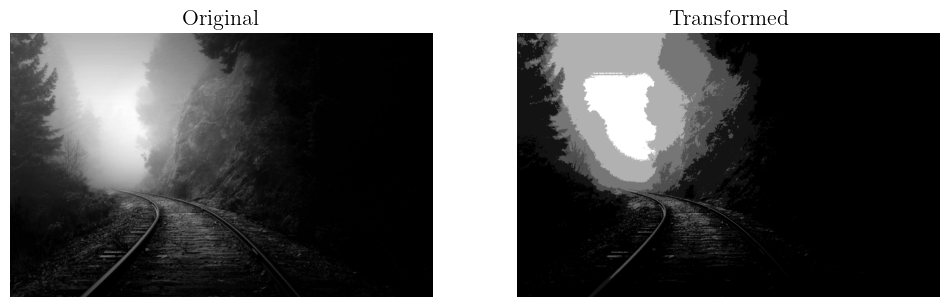

<Figure size 1200x700 with 0 Axes>

In [ ]:
def step_transform(img):
    # Define intensity thresholds and corresponding values
    thresholds = [30, 60, 90, 120, 160, 190, 220]
    values = [10, 20, 50, 70, 100, 140, 180, 200]

    # Apply stepwise transformation
    img = np.asarray(img)
    img = np.piecewise(img,
                       [img <= thresholds[0]] + [(img > thresholds[i]) & (img <= thresholds[i+1]) for i in range(len(thresholds) - 1)] + [img > thresholds[-1]],
                       values)

    img = Image.fromarray(np.uint8(img))

    return img

# Load input image as grayscaled
img = cv2.imread('nature_dark_forest.jpg', 0)

# Display both original and transformed images
fig, axes = plt.subplots(1, 2)

plt.subplot(1, 2, 1)
plt.imshow(img, 'gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(step_transform(img), 'gray')
plt.title('Transformed')
plt.axis('off')

plt.show()

plt.savefig('/kaggle/working/1.pdf', format='pdf', bbox_inches='tight', transparent=True)

## **Step 2**

Propose a method for enhancing the image `nature_dark_forest.jpg` in terms of the perceived light and color.

An approach to enhancing the contrast of a given color image involves applying histogram equalisation, which redistributes pixel intensities to produce a more uniform cumulative distribution function (CDF). This process improves image contrast by equalising the intensity distribution across the three color channels: Blue, Green, and Red. The `histogram_equalisation()` function, which achieves this enhancement, consists of several steps. Initially, the input image is separated into its three color channels, Blue (B), Green (G), and Red (R). Following this, histograms representing the distribution of pixel intensities within the image are computed for each color channel, with 256 bins corresponding to intensity values ranging from 0 to 255.

Next, cumulative distribution functions (CDFs) are calculated for each color channel's histogram, representing the cumulative sum of the histogram's bin counts and indicating the total number of pixel intensities equal to or less than a given value. To equalise the histograms, a mask is applied to each CDF, ignoring pixel values with a zero count. The masked CDFs are then linearly scaled, mapping the pixel intensities to a new range. This scaling ensures that the minimum CDF value corresponds to 0 and the maximum CDF value corresponds to 255. The final CDFs are filled with zeros for previously masked values and cast to unsigned 8-bit integers.

Subsequently, the original color channels are mapped to the equalized CDFs, resulting in equalised color channels. These channels are then merged back together to form the final equalised image, which is returned by the function. As a result, the output image displays more uniformly distributed intensity values, making details and features more discernible.

***Code source:*** https://towardsdatascience.com/histogram-matching-ee3a67b4cbc1/

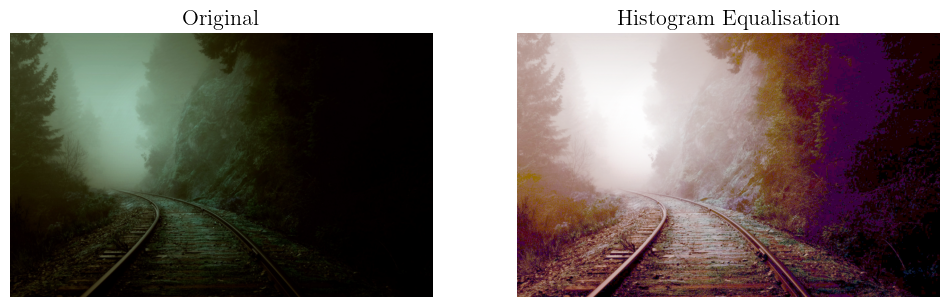

<Figure size 1200x700 with 0 Axes>

In [ ]:
def histogram_equalisation(img):
    # Segregate color streams
    b, g, r = cv2.split(img)
    h_b, bin_b = np.histogram(b.flatten(), 256, [0, 256])
    h_g, bin_g = np.histogram(g.flatten(), 256, [0, 256])
    h_r, bin_r = np.histogram(r.flatten(), 256, [0, 256])

    # Calculate cdf
    cdf_b = np.cumsum(h_b)
    cdf_g = np.cumsum(h_g)
    cdf_r = np.cumsum(h_r)

    # Mask all pixels with zero value and replace with mean of the pixel values
    cdf_m_b = np.ma.masked_equal(cdf_b, 0)
    cdf_m_b = (cdf_m_b - cdf_m_b.min())*255 / (cdf_m_b.max() - cdf_m_b.min())
    cdf_final_b = np.ma.filled(cdf_m_b, 0).astype('uint8')

    cdf_m_g = np.ma.masked_equal(cdf_g, 0)
    cdf_m_g = (cdf_m_g - cdf_m_g.min())*255 / (cdf_m_g.max() - cdf_m_g.min())
    cdf_final_g = np.ma.filled(cdf_m_g, 0).astype('uint8')

    cdf_m_r = np.ma.masked_equal(cdf_r, 0)
    cdf_m_r = (cdf_m_r - cdf_m_r.min())*255 / (cdf_m_r.max() - cdf_m_r.min())
    cdf_final_r = np.ma.filled(cdf_m_r, 0).astype('uint8')

    # Merge the images back to the three channels
    img_b = cdf_final_b[b]
    img_g = cdf_final_g[g]
    img_r = cdf_final_r[r]

    img_eq = cv2.merge((img_b, img_g, img_r))

    return img_eq

# Load input image
img = cv2.imread('nature_dark_forest.jpg')

# Display both original and equalised images
fig, axes = plt.subplots(1, 2)

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(histogram_equalisation(img))
plt.title("Histogram Equalisation")
plt.axis('off')

plt.show()

plt.savefig('/kaggle/working/2-1.pdf', format='pdf', bbox_inches='tight', transparent=True)

The output of the function `histogram_equalisation()`, increased in brightness though it may be, has an unusual red flare to it, which makes it unacceptable as a result, provided that the task was only to enhance contrast. The reddish output is a direct result from independent histogram equaliσation on each color channel (B, G, and R). Specifically, the red channel's intensities may be stretched more than blue and green, intensifying the red color in the equalised image. Instead, the function `histogram_equalisation_1()` was employed. It involves using the YCrCb color space and equalising only the Y channel, which represents luminance. This method preserves chrominance information (Cr and Cb channels), while enhancing the image's brightness and contrast without distorting colors.

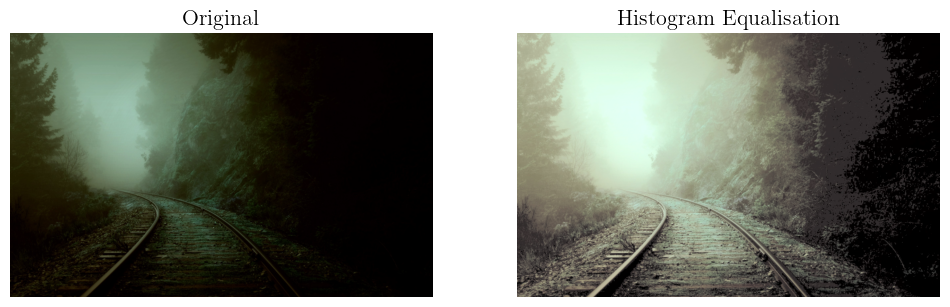

<Figure size 1200x700 with 0 Axes>

In [ ]:
def histogram_equalisation_1(img):
    ycrcb     = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    y, cr, cb = cv2.split(ycrcb)

    # Apply histogram equalisation to the Y channel
    y_eq = cv2.equalizeHist(y)

    # Merge all channels and convert back to RGB
    ycrcb_eq = cv2.merge((y_eq, cr, cb))
    img_eq   = cv2.cvtColor(ycrcb_eq, cv2.COLOR_YCrCb2BGR)

    return img_eq

# Load input image
img = cv2.imread('nature_dark_forest.jpg')

# Display both original and equalised images
fig, axes = plt.subplots(1, 2)

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(histogram_equalisation_1(img))
plt.title("Histogram Equalisation")
plt.axis('off')

plt.show()

plt.savefig('/kaggle/working/2-2.pdf', format='pdf', bbox_inches='tight', transparent=True)

## **Step 3**

Propose a method for improving the image `pollen-500x430px-96dpi.jpg` in terms the perceived brightness.

A way to increase the brightness of an image is by tweaking the Value channel in the HSV (Hue, Saturation, Value) color space. The Value channel (V) represents the brightness or intensity of the color, and essentially defines the brightness its on a scale from 0 to 255, with 0 being completely black and 255 being the maximum brightness or intensity. Increasing the value in the Value channel of a pixel will make the color appear brighter, while decreasing the value will make it appear darker. The following code does just that. Suppose that an input image is denoted as $I(x,y)$, where $x$ and $y$ are the spatial coordinates of the pixel. The `increase_brightness()` function adjusts the brightness of the image by a specified value $v$, such that the new image $I'(x,y)$ is given by

$$I'(x,y) = \begin{cases} 255, & I(x,y) + v > 255 \\ I(x,y) + v, & \text{else.} \end{cases}$$

This operation is applied to the Value channel (V) of the input image in the HSV color space, with the Hue (H) and Saturation (S) channels unchanged. The resulting modified image in the HSV color space is then converted back to the BGR color space to obtain the final output image with increased brightness.

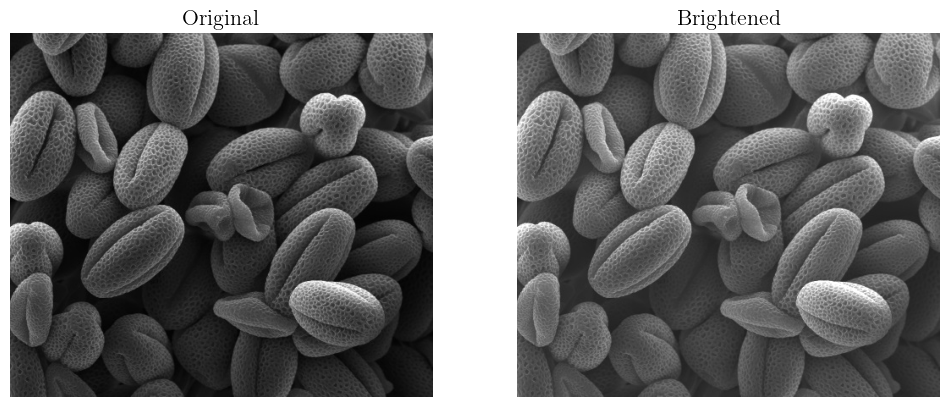

<Figure size 1200x700 with 0 Axes>

In [ ]:
def increase_brightness(img, value=30):
    hsv     = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    # Adjust value channel
    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value

    # Merge all channels and convert back to RGB
    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)

    return img

# Load the input image
img = cv2.imread('pollen-500x430px-96dpi.jpg')

# Display both original and brightened images
fig, axes = plt.subplots(1, 2)

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(increase_brightness(img))
plt.title('Brightened')
plt.axis('off')

plt.show()

plt.savefig('/kaggle/working/3.pdf', format='pdf', bbox_inches='tight', transparent=True)

## **Step 4**

Propose a method for sharpening the image `First-photo-of-the-moon-from-Chandrayaan-2_ISRO.jpg.`

In order enhances the sharpness of an input image, one can apply a sharpening kernel using convolution. The kernel of choice is a 3x3 matrix with -1 values for neighbours and a 9 at the center,

$$\text{kernel} = \begin{bmatrix}
-1 & -1 & -1 \\
-1 &  9 & -1 \\
-1 & -1 & -1
\end{bmatrix}.$$

This specific kernel is designed to accentuate the differences between a pixel and its neighbours, resulting in a sharpened output image. The sharpening occurs because the convolution process effectively computes a weighted sum of a pixel's value and its neighbouring pixels' values. With the given kernel, the central pixel's value is multiplied by 9, while the surrounding pixels' values are multiplied by -1. When these products are summed, the central pixel's value becomes more prominent, while the neighboring pixel values are reduced. This operation amplifies high-frequency details, such as edges and fine structures, thereby enhancing the sharpness and overall contrast of the image.

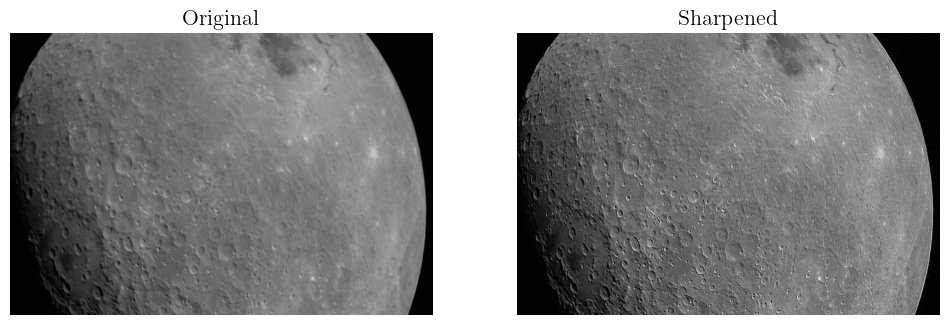

<Figure size 1200x700 with 0 Axes>

In [ ]:
def sharpening(img):
    # Create a sharpening kernel
    kernel = np.ones((3, 3)) * (-1)
    kernel[1, 1] = 9

    # Apply kernel to image
    sharpened_img = cv2.filter2D(img, -1, kernel)

    return sharpened_img

# Load the input image
img = cv2.imread('First-photo-of-the-moon-from-Chandrayaan-2_ISRO.jpg')

# Display both original and sharpened images
fig, axes = plt.subplots(1, 2)

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sharpening(img))
plt.title('Sharpened')
plt.axis('off')

plt.show()

plt.savefig('/kaggle/working/4.pdf', format='pdf', bbox_inches='tight', transparent=True)

## **Step 5**
One combined spatial enhancement methods (e.g. arithmetic operations, gray level transformations, and/or sharpening spatial filters) to convert `image_1` to `image_2.`

a) Try to guess the processing steps she adopted. [Note the dynamic range and brightness of the enhanced image, and the noise introduced.]

b) Propose a pipeline of processes with the aim of approximating `image_1` starting from `image_2.`


The `similarity_blend()` function quantifies image similarity by combining *Mean Structural Similarity Index (MSSIM)* and *Normalized Mutual Information (NMI)* into a single blended score, weighted by `w_mssim` and `w_nmi`. MSSIM (ranging from –1 to 1) captures luminance, contrast, and structural similarity, computed via `structural_similarity` and using an 11×11 Gaussian weighting (per Wang et al. 2003, [https://www.cns.nyu.edu/pub/eero/wang03-reprint.pdf](https://www.cns.nyu.edu/pub/eero/wang03-reprint.pdf)). NMI (0 to 1) measures statistical dependence between images via joint and marginal distributions, calculated by `normalized_mutual_info_score` (see [https://pubmed.ncbi.nlm.nih.gov/16355416/](https://pubmed.ncbi.nlm.nih.gov/16355416/)). The two scores are normalized into [0,1] and then combined via a weighted sum to yield a final similarity score that balances structural and information‐theoretic similarity.


In [ ]:
def mssim(img1, img2, window_size=11, sigma=1.5):
    # Apply SSIM regionally, using a 11x11 kernel
    mssim_value, _ = ssim(img1, img2,
                          full             = True,
                          gaussian_weights = True,
                          win_size         = window_size,
                          sigma            = sigma)

    return mssim_value


def similarity_blend(img1, img2, w_mssim=0.6, w_nmi=0.4):
    # Input images ought to be grayscaled
    mssim_value = mssim(img1, img2)
    nmi_value  = nmi(img1[:, :].ravel(), img2[:, :].ravel())

    # Normalise individual similarity metrics to range [0, 1]
    mssim_norm = (mssim_value + 1) / 2
    nmi_norm   = nmi_value

    # Calculate the blended similarity score
    total_weight     = w_mssim + w_nmi
    similarity_score = (w_mssim * mssim_norm + w_nmi * nmi_norm) / total_weight

    return similarity_score

## Approximating `image_2`(target) starting from `image_1`(source)

Upon comparing the two images, it is evident that image 2 is complementary to image 1. Furthermore, image 2 contains noise relative to image 1 and exhibits a different dynamic range and brightness. To create image 2 based on image 1, we will establish a pipeline consisting of several spatial enhancement methods.

The pipeline used to generate the second image from the first image involves the following steps:

1. **Applying the unsharp kernel:** Unsharp masking (`unsharp_mask()`) amplifies high-frequency components in the image. This filter subtracts an unsharp (blurred) version of the original image from the original image itself.
$$
\text{unsharp kernel} = \frac{1}{α+1} \left[\begin{array}
{rrr}
-α & α-1 & -α \\
α-1 & α+5 & α-1 \\
-α & α-1 & -α
\end{array}\right]
$$

2. **Performing Gamma Correction:** The human visual system is more sensitive to changes in dark tones. Gamma Correction, also known as Power Law Transform, corrects the differences between what a camera captures and what the human eye perceives. The image is transformed following the gamma correction according to the formula: $O = I^{\frac{1}{\gamma}}$, where $O$ is the transformed image and I is the initial image. If $\gamma > 1$, the transformed image is lighter than the original image, and vice versa if $\gamma < 1$. A gamma correction (`adjust_gamma`) is applied with $\gamma < 1$ after using the unsharp filter, creating a darker image as dark pixels are mapped to a larger set.

3. **Calculating the complement of the grayscale image:**  Image values are subtracted from 255 to generate the complement of the image.

4. **Amplifying the existing noise:** Lastly, the pipeline amplifies the noise(`amplify_noise`) already present in the image.

By following these steps in the pipeline, image 2 is successfully created based on image 1, while accounting for the differences in noise, dynamic range, and brightness. A rather clumsy approach to finding the optimal parameters, for the respective processes of the pipeline, was employed by using the `optimal_parameters()` function.

In [ ]:
def adjust_gamma(image, gamma=1.0):
    inv_gamma = 1.0 / gamma
    image = image.astype(np.float32) / 255.0
    image = np.power(image, inv_gamma) * 255.0
    return image.astype(np.uint8)


def unsharp_mask(alpha=0.2):
    # Define the two kernels
    kernel1 = np.array([[-1, 1, -1], [1, 1, 1], [-1, 1, -1]])
    kernel2 = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

    # Compute the combined unsharp mask kernel
    unsharp_kernel = (alpha * kernel1 + kernel2) / (alpha + 1)

    return unsharp_kernel

def amplify_noise(image, scale_factor):
    # Apply Gaussian blur to the input image
    blurred_image = cv2.GaussianBlur(image, (7, 7), 0)

    # Subtract the blurred image from the original image to obtain the noise
    noise = cv2.subtract(image, blurred_image)

    # Multiply the noise by the scale factor
    amplified_noise = cv2.multiply(noise, scale_factor)

    # Add the amplified noise back to the original image
    amplified_noisy_image = cv2.add(image, amplified_noise)

    return amplified_noisy_image


def optimal_parameters(source, target, gamma_values, alpha_values, beta_values):
    best_params = None
    best_sim    = 0

    for gamma in gamma_values:
        for alpha in alpha_values:
            for beta in beta_values:
                # Unsharpen
                kernel = unsharp_mask(alpha)
                corrected = cv2.filter2D(source, -1,
                                         kernel, cv2.BORDER_CONSTANT)
                # Gamma adjustment
                corrected = adjust_gamma(corrected, gamma)
                # Complement
                corrected = 255 - corrected
                # Introduction & amplification of Gaussian noise
                corrected = amplify_noise(corrected, beta)

                # Current similarity
                cur_sim = similarity_blend(corrected, target)

                if cur_sim > best_sim:
                    pip_image   = corrected
                    best_sim    = cur_sim
                    best_params = (alpha, beta, gamma)

    return pip_image, best_params, best_sim

So, based on the conceived similarity index, after the pipeline is applied, a result of 76.10% similar to the target image is achieved.

In [ ]:
source_image = cv2.imread("image_1.jpg", 0)
target_image = cv2.imread("image_2.jpg", 0)

alpha_values = np.linspace(0.05, 0.5, 10)
beta_values  = np.linspace(1.6, 2.1, 6)
gamma_values = np.linspace(0.15, 0.35, 10)

pipelined_image, best_params, best_sim = optimal_parameters(
                                                            source_image,
                                                            target_image,
                                                            gamma_values,
                                                            alpha_values,
                                                            beta_values
                                                           )

print("Best parameters: alpha={:.2f}, beta={:.1f}, gamma={:.2f}".format(*best_params))
print("Best achieved similarity:{: .2f}%".format(best_sim*100))

Best parameters: alpha=0.45, beta=1.8, gamma=0.26
Best achieved similarity: 76.10%


Some qualitative plots on the aforementioned pipeline.

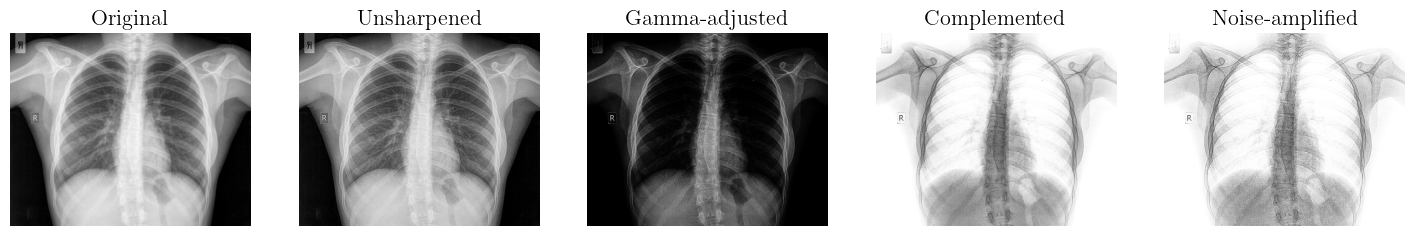

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(18, 8))

# Source Image
plt.subplot(1, 5, 1), plt.imshow(source_image, cmap='gray'), plt.title('Original'), plt.axis('off')

# Unsharpened
kernel = unsharp_mask(best_params[0])
unsharpened = cv2.filter2D(source_image, -1, kernel, cv2.BORDER_CONSTANT)
plt.subplot(1, 5, 2), plt.imshow(unsharpened, cmap='gray'), plt.title('Unsharpened'), plt.axis('off')

# Gamma-adjusted
gamma_adjusted = adjust_gamma(unsharpened, best_params[2])
plt.subplot(1, 5, 3), plt.imshow(gamma_adjusted, cmap='gray'), plt.title('Gamma-adjusted'), plt.axis('off')

# Complement
complemented = 255 - gamma_adjusted
plt.subplot(1, 5, 4), plt.imshow(complemented, cmap='gray'), plt.title('Complemented'), plt.axis('off')

# Noise-amplified
amplified = amplify_noise(complemented, best_params[1])
plt.subplot(1, 5, 5), plt.imshow(amplified, cmap='gray'), plt.title('Noise-amplified'), plt.axis('off')

plt.savefig('/kaggle/working/5a-1.pdf', format='pdf', bbox_inches='tight', transparent=True)

And lastly, a reality check by observing the histograms between the pipelined and the target image. The histograms of the two images nearly coincide.

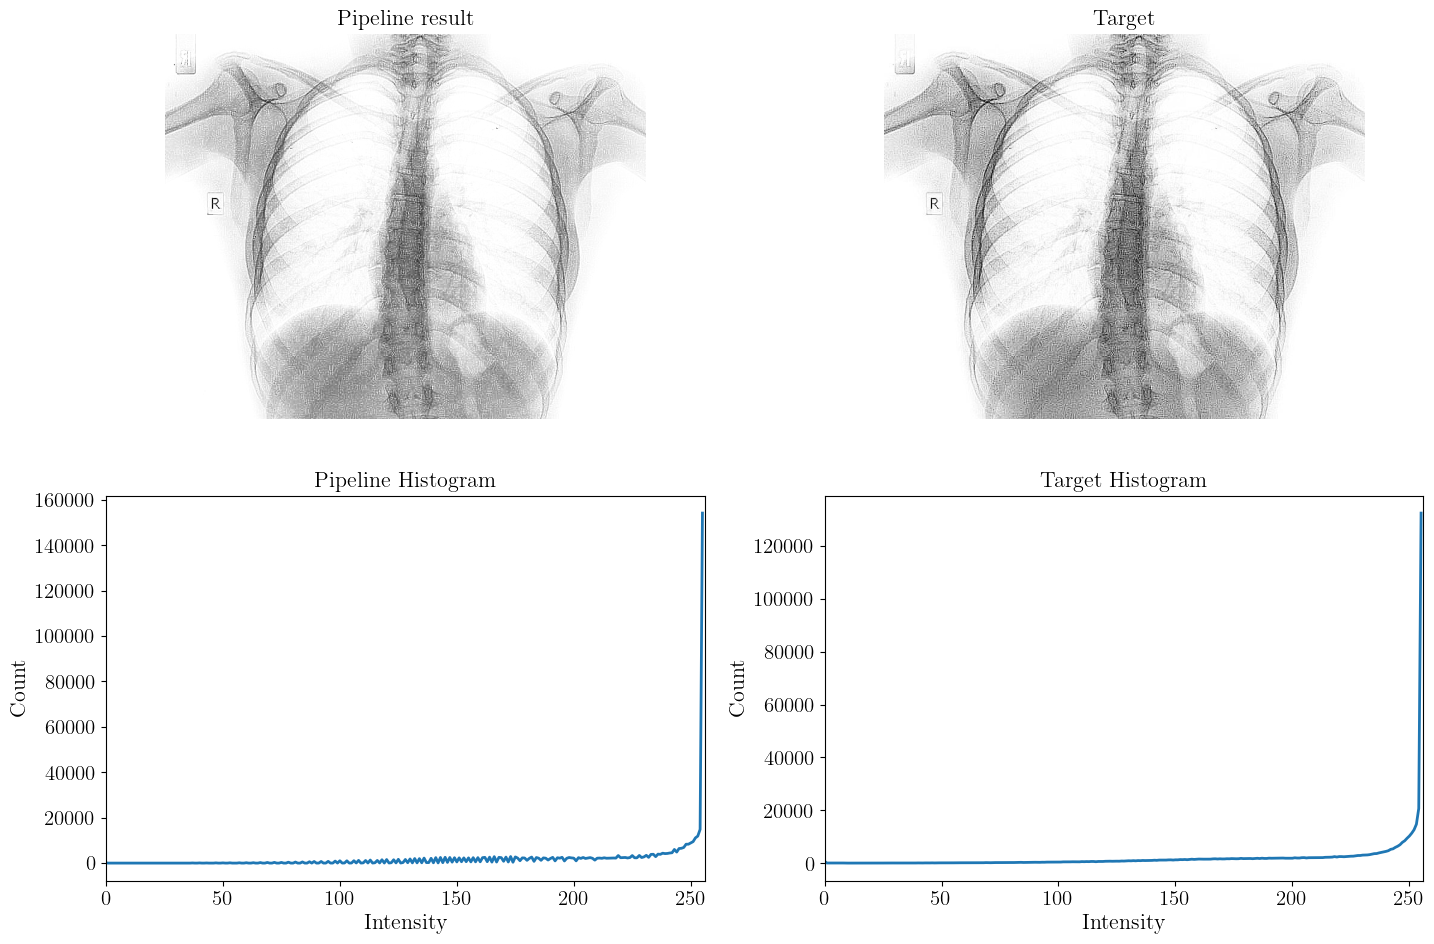

<Figure size 1200x700 with 0 Axes>

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(17, 11))

# Pipeline result
axes[0, 0].imshow(pipelined_image, cmap='gray')
axes[0, 0].axis('off')
axes[0, 0].set_title('Pipeline result')

# Target image
axes[0, 1].imshow(target_image, cmap='gray')
axes[0, 1].axis('off')
axes[0, 1].set_title('Target')

# Pipeline histogram
hist = np.bincount(pipelined_image[:,:].ravel(), minlength=256)
axes[1, 0].plot(hist, lw=2)
axes[1, 0].set_xlim([0, 256])
axes[1, 0].set_xlabel('Intensity')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Pipeline Histogram')

# Target histogram
hist = np.bincount(target_image[:,:].ravel(), minlength=256)
axes[1, 1].plot(hist, lw=2)
axes[1, 1].set_xlim([0, 256])
axes[1, 1].set_xlabel('Intensity')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Target Histogram')

plt.show()
plt.savefig('/kaggle/working/5a-2.pdf', format='pdf', bbox_inches='tight', transparent=True)

## Approximating `image_1`(target) starting from `image_2`(source)

In this step, the objective is to reverse the process and transform image 2 back into image 1. It is observed that image 2 is noisy, requiring the use of appropriate filters to reduce the noise. Additionally, the target image is complementary to the initial image, and the two images exhibit differences in brightness. To achieve the transformation from one image to another as effectively as possible, the following steps are followed:

1. **Applying a Gaussian filter:** Gaussian filters are low-pass filters constructed based on a Gaussian probability distribution function. This implies that the kernel takes into account the pixels closer to the central pixel. The degree to which the kernel is influenced by nearby pixels depends on the standard deviation ($\sigma$) of the Gaussian kernel, which is selected by the user. A smaller standard deviation results in a more concentrated curve derived from the Gaussian distribution, causing the kernel to be more influenced by pixels closer to the central pixel. This type of filter is employed to reduce the noise present in image 1.

2. **Calculating the complement of the grayscale image:** After applying the low-pass filters to reduce noise, the complement of the image is obtained. As seen later in Figure "Step 2," the resulting image is considerably darker compared to the target image, necessitating a transformation to make it lighter.

3. **Performing Gamma Correction:** Gamma Correction is applied to the image to make it lighter. As previously discussed, this transformation adjusts the image's brightness. In this case, $\gamma$ is set to be greater than 1, as the goal is to produce a lighter image.

Again, an optimal $\gamma$ value is required. For that purpose, the `optimal_parameter()` function is employed.

In [ ]:
def optimal_parameter(source, target, gamma_values):
    best_params = None
    best_sim    = 0

    for gamma in gamma_values:
        # Unsharpening
        corrected = cv2.GaussianBlur(source, (7, 7), 0)
        # Complement
        corrected = 255 - corrected
        # Gamma adjustment
        corrected = adjust_gamma(corrected, gamma)

        # Current similarity
        cur_sim = similarity_blend(corrected, target)

        if cur_sim > best_sim:
            pip_image   = corrected
            best_sim    = cur_sim
            best_params = gamma

    return pip_image, best_params, best_sim

So, based on the conceived similarity indes, after the pipeline is applied, a result of 74.80% similar to the target image is achieved. Even if the employed method is not robust, a lower similarity value was to expected. In contrast to the previous pipeline, in this pipeline begins using a modified image (to the official source), so absence of pixel information is to be expected.

In [ ]:
source_image = cv2.imread("image_2.jpg", 0)
target_image = cv2.imread("image_1.jpg", 0)

gamma_values = np.linspace(2.5, 5, 30)

pipelined_image, best_params, best_sim = optimal_parameter(
                                                           source_image,
                                                           target_image,
                                                           gamma_values
                                                          )

print("Best parameters: gamma={:.2f}".format(best_params))
print("Best achieved similarity:{: .2f}%".format(best_sim*100))

Best parameters: gamma=4.05
Best achieved similarity: 74.80%


Some qualitative plots on the aforementioned pipeline.

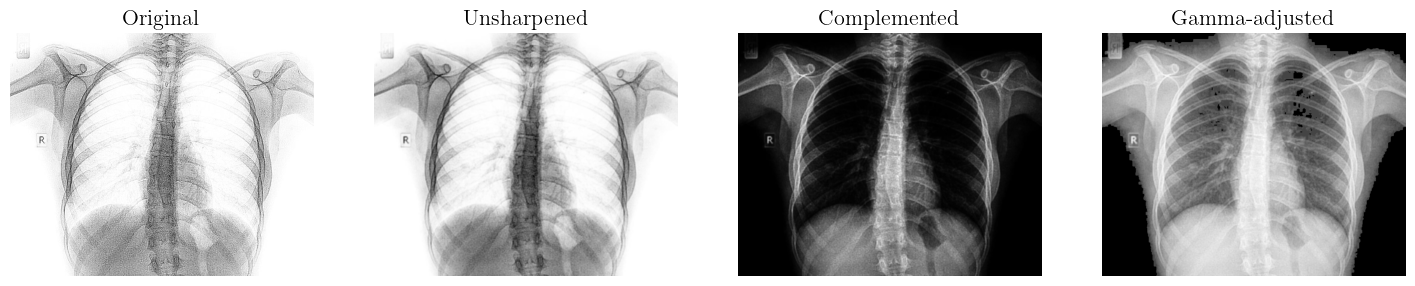

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(18, 8))

# Source Image
plt.subplot(1, 4, 1), plt.imshow(source_image, cmap='gray'), plt.title('Original'), plt.axis('off')

# Unsharpened
unsharpened = cv2.GaussianBlur(source_image, (7, 7), 0)
plt.subplot(1, 4, 2), plt.imshow(unsharpened, cmap='gray'), plt.title('Unsharpened'), plt.axis('off')

# Complement
complemented = 255 - unsharpened
plt.subplot(1, 4, 3), plt.imshow(complemented, cmap='gray'), plt.title('Complemented'), plt.axis('off')

# Gamma-adjusted
gamma_adjusted = adjust_gamma(complemented, best_params)
plt.subplot(1, 4, 4), plt.imshow(gamma_adjusted, cmap='gray'), plt.title('Gamma-adjusted'), plt.axis('off')

plt.savefig('/kaggle/working/5b-1.pdf', format='pdf', bbox_inches='tight', transparent=True)

Lastly, a reality check is conducted by comparing the histograms between the pipelined and the target image. It is observed that the histograms of the two images are significantly different. This difference can be attributed to the fact that the initial image contains noise that needs to be reduced. Moreover, the image is considerably lighter compared to the initial image of the first pipeline, resulting in some of the information being inaccurate and hindering the achievement of desirable results in the reverse pipeline.

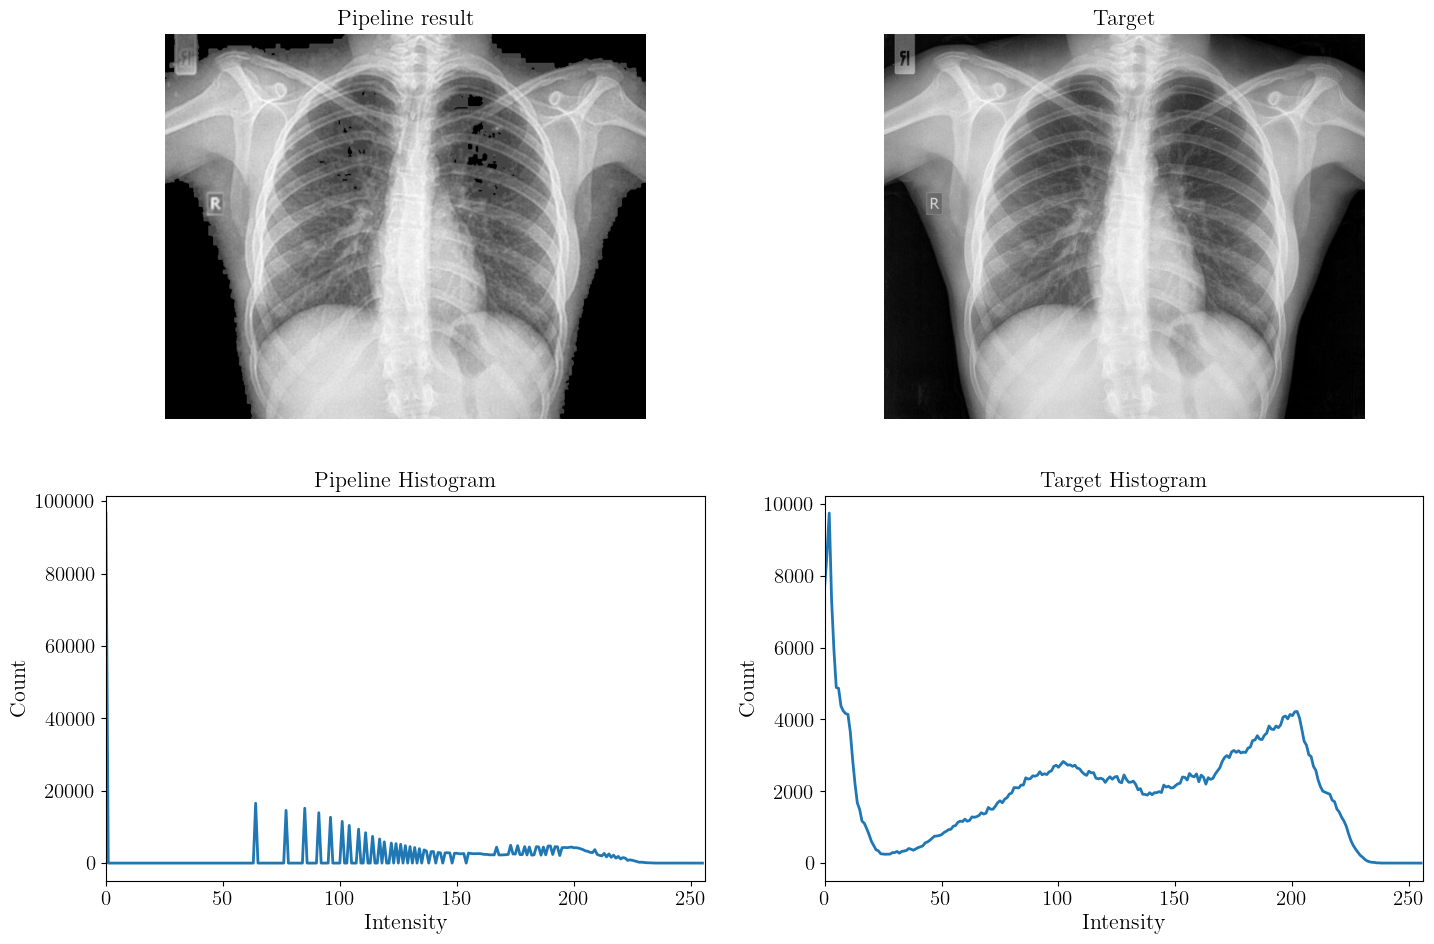

<Figure size 1200x700 with 0 Axes>

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(17, 11))

# Pipeline result
axes[0, 0].imshow(pipelined_image, cmap='gray')
axes[0, 0].axis('off')
axes[0, 0].set_title('Pipeline result')

# Target image
axes[0, 1].imshow(target_image, cmap='gray')
axes[0, 1].axis('off')
axes[0, 1].set_title('Target')

# Pipeline histogram
hist = np.bincount(pipelined_image[:,:].ravel(), minlength=256)
axes[1, 0].plot(hist, lw=2)
axes[1, 0].set_xlim([0, 256])
axes[1, 0].set_xlabel('Intensity')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Pipeline Histogram')

# Target histogram
hist = np.bincount(target_image[:,:].ravel(), minlength=256)
axes[1, 1].plot(hist, lw=2)
axes[1, 1].set_xlim([0, 256])
axes[1, 1].set_xlabel('Intensity')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Target Histogram')

plt.show()
plt.savefig('/kaggle/working/5b-2.pdf', format='pdf', bbox_inches='tight', transparent=True)

## **Step 6**

a. Find the main edges of `image11.jpg.`
b. Estimate the angle (with respect to the horizontal axis) of the diagonal edges of the roof.
c. Find the corners of the `image11.jpg.`
d. Based on the detected corners, locate the windows.

### A

In [ ]:
def calculate_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)

def gaussian_lp_filter(D0, img_shape):
    base_arr = np.zeros(img_shape[:2])
    rows, cols = img_shape[:2]
    center_point = (rows / 2, cols / 2)
    for x_idx in range(cols):
        for y_idx in range(rows):
            base_arr[y_idx, x_idx] = np.exp(((-calculate_distance((y_idx, x_idx), center_point) ** 2) / (2 * (D0 ** 2))))
    return base_arr

def apply_gaussian_filter(img):
    original_fft = np.fft.fft2(img)
    shifted_fft = np.fft.fftshift(original_fft)
    low_pass_center = shifted_fft * gaussian_lp_filter(50, img.shape)
    low_pass_filtered = np.fft.ifftshift(low_pass_center)
    inverse_low_pass = np.fft.ifft2(low_pass_filtered)
    return np.abs(inverse_low_pass)


In the first part of the exercise, the primary objective is to identify the main edges of the given image. A highly effective and widely employed method for achieving this is the utilization of the Canny edge detector. To ensure optimal results from the Canny algorithm, image blurring must be performed prior to applying the algorithm. Various image blurring techniques, as explored earlier in the course, will be examined.

As observed in the results bellow, Gaussian filtering, whether in the original or frequency domain, failed to detect a significant edge (the prominent horizontal line at the roof) and identified edges in the grass and flower regions of the image. These edges are not considered primary and can be regarded as noise. Consequently, the Median filter is deemed the most appropriate choice for capturing only the main edges.

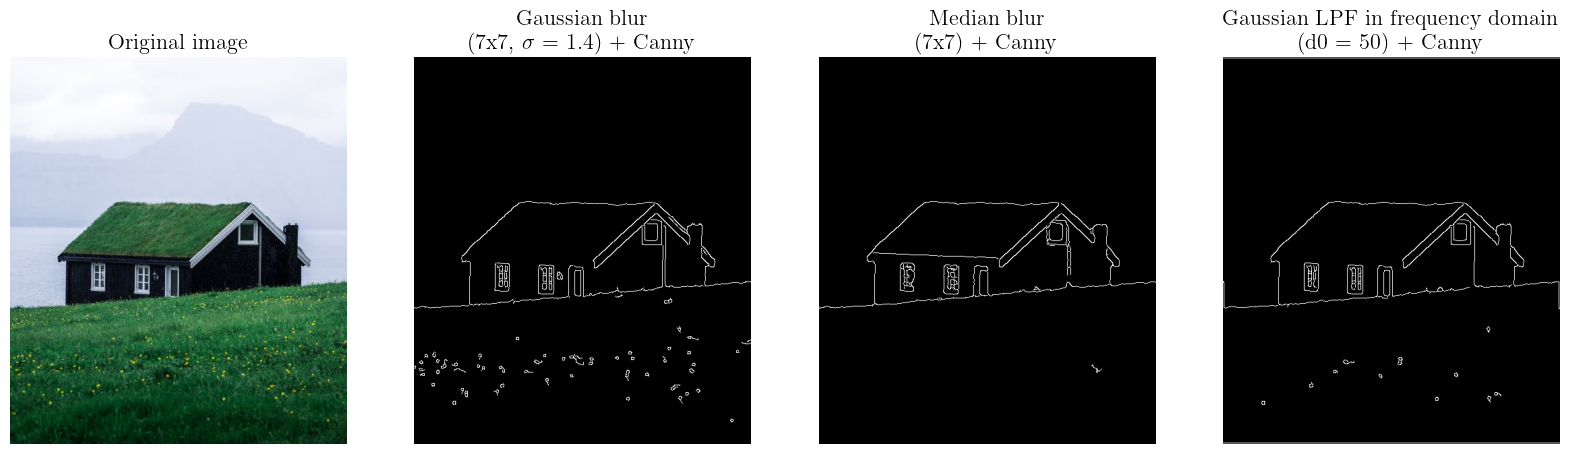

<Figure size 1200x700 with 0 Axes>

In [ ]:
img = cv2.imread('image11.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img_blur_median = cv2.medianBlur(gray_img, 7)
img_blur_gaussian = cv2.GaussianBlur(gray_img, (7, 7), 0)
img_blur_gfreq = apply_gaussian_filter(gray_img).astype(np.uint8)

# Canny
v_val = np.median(gray_img)
sigma_val = 0.5
lower_threshold = int(max(0, (1.0 - sigma_val) * v_val))
upper_threshold = int(min(255, (1.0 + sigma_val) * v_val))
img_canny_median = cv2.Canny(img_blur_median, lower_threshold, upper_threshold)
img_canny_gaussian = cv2.Canny(img_blur_gaussian, lower_threshold, upper_threshold)
img_canny_gfreq = cv2.Canny(img_blur_gfreq, lower_threshold, upper_threshold)

fig, axes = plt.subplots(1, 4, figsize=(20, 18))

plt.subplot(141), plt.imshow(img, cmap='gray')
plt.title('Original image'), plt.xticks([]), plt.axis('off')

plt.subplot(142), plt.imshow(img_canny_gaussian, cmap='gray')
plt.title('Gaussian blur \n (7x7, $\sigma$ = 1.4) + Canny'), plt.axis('off')

plt.subplot(143), plt.imshow(img_canny_median, cmap='gray')
plt.title('Median blur \n (7x7) + Canny'), plt.axis('off')

plt.subplot(144), plt.imshow(img_canny_gfreq, cmap='gray')
plt.title('Gaussian LPF in frequency domain \n (d0 = 50) + Canny'), plt.axis('off')

plt.show()
plt.savefig('/kaggle/working/6a.pdf', format='pdf', bbox_inches='tight', transparent=True)

### B

In this part of the exercise, the objective is to determine the angle formed between the diagonal lines of the roof and the horizontal axis, following the conventions of polar coordinate systems (i.e. $\theta$ are the counterclockwise angles from the horizontal axis). The Hough algorithm is particularly well-suited for this task. To identify the desired angles, the following steps will be undertaken:

1. Retain only the diagonal edges from the previously identified edges. To achieve this, morphological openings with a   diagonal and an anti-diagonal kernel will be performed, followed by the addition of the results.
2. Execute the Hough algorithm.
3. Utilising the returned parameter $\theta$, the angle between the line and the horizontal axis can be calculated.

After some parameter tuning, the lines and angles were successfully identified, and the results are displayed below.

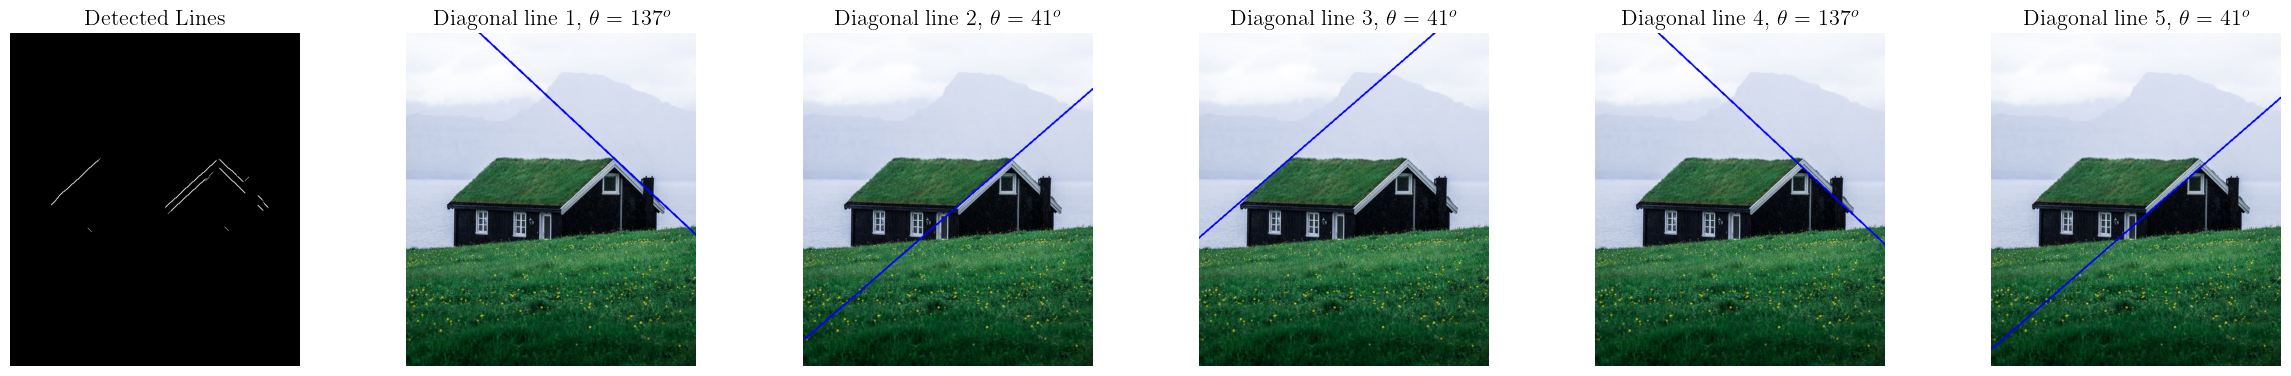

<Figure size 1200x700 with 0 Axes>

In [ ]:
def calculate_degree(lines):
    theta = lines[0][0][1]
    return (round(math.degrees(theta)) + 90) % 180

def find_diagonal_lines(image, edges):
    kernel = np.zeros((7, 7), dtype=np.uint8)
    np.fill_diagonal(kernel, 1)
    kernel_anti = np.fliplr(kernel)
    img1 = cv2.morphologyEx(edges, cv2.MORPH_OPEN, kernel)
    img2 = cv2.morphologyEx(edges, cv2.MORPH_OPEN, kernel_anti)
    img_final = cv2.add(img1, img2)
    kernel = np.ones((3, 3), dtype=np.uint8)

    lines = cv2.HoughLines(img_final, 1, 7 * (np.pi / 180), 50)
    image_all_lines = image.copy()

    fig, axes = plt.subplots(1, len(lines) + 1, figsize=(4 * (len(lines) + 1), 4))

    axes[0].imshow(img_final, cmap='gray')
    axes[0].set_title('Detected Lines')
    axes[0].axis('off')

    for i, line in enumerate(lines):
        image_tmp = image.copy()
        rho, theta = line[0]
        deg = calculate_degree([line])
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))

        # Draw the line on the temporary image
        cv2.line(image_tmp, (x1, y1), (x2, y2), (0, 0, 255), 2)

        axes[i + 1].imshow(image_tmp)
        axes[i + 1].set_title(f'Diagonal line {i + 1}, ' + r'$\theta =$' + f' {180 - deg}$^o$')
        axes[i + 1].axis('off')

    plt.tight_layout()
    plt.show()
    plt.savefig('/kaggle/working/6b.pdf', format='pdf', bbox_inches='tight', transparent=True)

    return image_all_lines

image_result = find_diagonal_lines(img, img_canny_median)

### C

In the third part of the exercise, corners in the image need to be found. The Harris corner detection algorithm is applied for this purpose, as it identifies corner points in the image effectively. First, the image is converted to grayscale, and a median filter is applied to filter out any noise that might be falsely detected as corners. This is particularly important for the grassy region of the image, which is noisy and has many fluctuations in intensity. Without blurring the image, most of the detected corners would be in that region and would not be meaningful. The code snippet below demonstrates this process. As expected, a significant concentration of corners is observed at the points where edges intersect, particularly around the wooden windows. This demonstrates the effectiveness of the Harris corner detection algorithm in identifying key corners in the image.

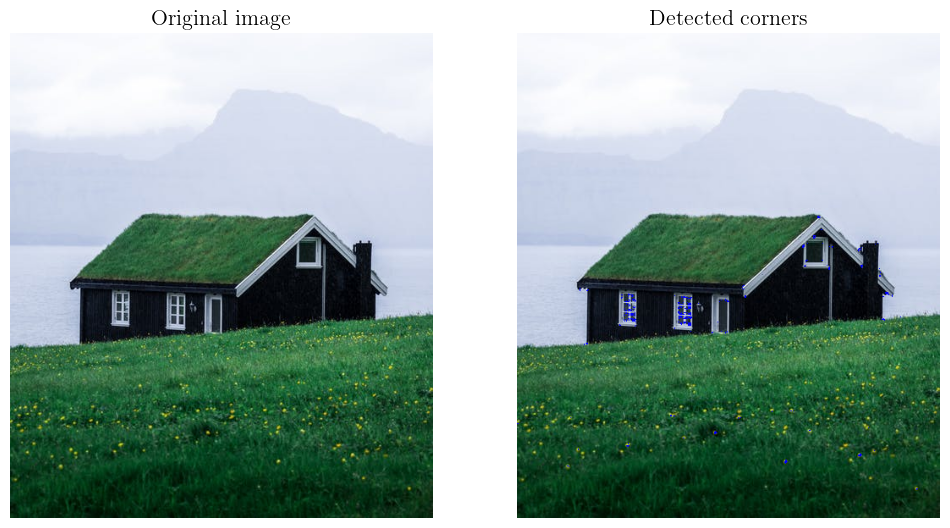

<Figure size 1200x700 with 0 Axes>

In [ ]:
# Load image, convert it to grayscale and apply median blur
img = cv2.imread('image11.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray = cv2.medianBlur(gray, 5)

# Convert the image to float32
gray = np.float32(gray)

# Apply the Harris corner detection
dst = cv2.cornerHarris(gray, 2, 3, 0.04)

# Create an empty array of zeros with the same shape as the image
corners = np.zeros(dst.shape).astype(np.float32)
corners[dst > 0.01 * dst.max()] = 1

# Create a copy of the original image and overlay the corners on it
corners_img = img.copy()
corners_img[corners > 0] = [0, 0, 255]

# Display the original image and the image with detected corners
fig, axes = plt.subplots(1, 2)

plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Original image'), plt.axis('off')

plt.subplot(122), plt.imshow(corners_img, cmap='gray'), plt.title('Detected corners'), plt.axis('off')

plt.show()

plt.savefig('/kaggle/working/6c.pdf', format='pdf', bbox_inches='tight', transparent=True)

### D
In the final part of the exercise, the task is to locate the windows in the image based on the detected corners. The corners identified in the previous part of the exercise will be utilised in conjunction with morphological operations. The process followed is outlined step by step below:

1. Obtain the image edges using a 5x5 median filter.
2. Perform morphological opening on the edges with diagonal and anti-diagonal kernels, and then subtract the result from the edges to remove the unnecessary diagonal edges for window identification.
3. To retain areas with high corner concentration, apply dilation followed by an opening on the image containing the corners. This approach creates dense surfaces in areas with high corner concentration, while sparsely spaced dilated corners in other areas are removed by an opening.
4. Apply morphological reconstruction to reconstruct the edges mainly surrounding the areas with corner concentration.
5. Perform a small dilation to ensure the borders of the square areas (windows) connect.
6. Use the `fill_holes` function from ndimage to fill the square areas, forming the surfaces that represent the windows.
7. Erode the image using the same kernel as the dilation to revert the effects of dilation after filling the square objects.
8. Apply a morphological opening with a 9x9 kernel to eliminate thin lines and small patches.
9. Perform a morphological closing to smoothen out small irregularities on the border or small holes.
10. Under the assumption that the rectangular object, lying on the same side of the house as the two wooden windows,  potentially is a door, remove it using the `Connected Components` with `Stats` OpenCV function.

**Note:** The following code requires that part C (for variables `edges` and `corners` has been run a priori.

In [ ]:
def get_edges(gray, sigma=0.5):
    v = np.median(gray)
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    gray = gray.astype(np.uint8)
    return cv2.Canny(gray, lower, upper)

def remove_diagonal_edges(edges):
    kernel = np.zeros((7, 7), dtype=np.uint8)
    np.fill_diagonal(kernel, 1)
    kernel_anti = np.fliplr(kernel)
    img1 = cv2.morphologyEx(edges, cv2.MORPH_OPEN, kernel)
    img2 = cv2.morphologyEx(edges, cv2.MORPH_OPEN, kernel_anti)
    img_final = cv2.add(img1, img2)
    return cv2.subtract(edges, img_final)


def process_corners(corners):
    kernel_dilate = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 9))
    corners_dilated = cv2.dilate(corners, kernel_dilate, iterations=1)

    kernel_open = cv2.getStructuringElement(cv2.MORPH_RECT, (11, 11))
    corners_opened = cv2.morphologyEx(corners_dilated, cv2.MORPH_OPEN, kernel_open)

    return corners_dilated, corners_opened

def reconstruct_image(marker, mask, radius = 1, iterations = 10):
    i = 1
    kernel = np.ones(shape=(radius * 2 + 1, radius * 2 + 1), dtype=np.uint8)
    while True:
        expanded = cv2.dilate(src=marker, kernel=kernel)
        cv2.bitwise_and(src1=expanded, src2=mask, dst=expanded)
        if i >= iterations:
            return expanded

        # Termination criterion: Expansion didn't change the image at all
        if (marker == expanded).all():
            return expanded
        marker = expanded
        i += 1


# Get edges using a 5x5 median filter
edges = get_edges(gray)

# Remove unecessary, diagonal, edges
edges_without_diagonal = remove_diagonal_edges(edges)

# Make surfaces in areas with high corner concentration denser
corners_dilated, corners_opened = process_corners(corners)

# Reconstruct edges lying in dense corner-concentration areas
edges_recon = reconstruct_image(corners_opened.astype(np.uint8), edges_without_diagonal, 5)

# Make sure that borders of windows connect with one another
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3, 3))
edges_recon_conn = cv2.dilate(edges_recon, kernel, iterations = 1)

# Fill areas on which the windows lie
edges_recon_fill = ndimage.binary_fill_holes(edges_recon_conn).astype(np.uint8)

# Revert dilation effects
edges_recon_rev = cv2.erode(edges_recon_fill, kernel,iterations = 1)

# Again remove any small artifacts
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(7, 7))
edges_recon_rev2 = cv2.morphologyEx(edges_recon_rev, cv2.MORPH_OPEN, kernel)

# Remove thin lines and small patches
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(9, 9))
edges_recon_rem = cv2.morphologyEx(edges_recon_rev2, cv2.MORPH_CLOSE, kernel)

# Remove alleged door
connectivity = 4
output = cv2.connectedComponentsWithStats(edges_recon_rem, connectivity, cv2.CV_32S)
num_labels, labels, stats, centroids = output

heights = stats[:, -2]
widths = stats[:, -3]

max_label = 1
max_ratio = heights[1] / widths[1]
for i in range(2, num_labels):
    ratio = heights[i] / widths[i]
    if ratio > max_ratio:
        max_label = i
        max_ratio = ratio

labels = np.where(labels == max_label, 0, labels)
windows_only = np.where(labels > 0, 255, 0)
windows_only_img = img.copy()
windows_only_img[windows_only > 0] = [0, 0, 255]

And some visual flare on the aforementioned pipeline.

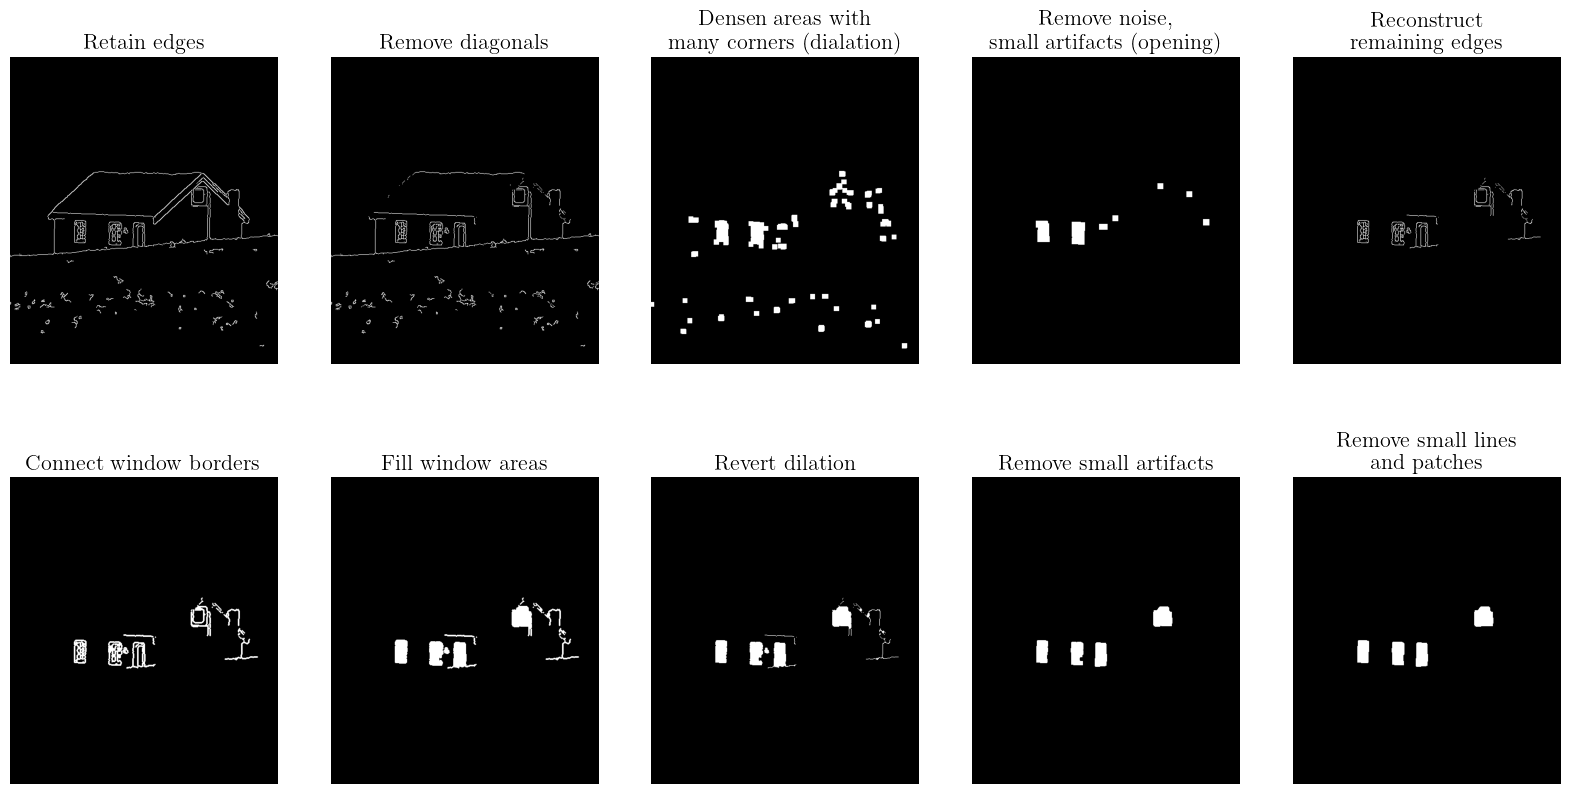

<Figure size 1200x700 with 0 Axes>

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))

plt.subplot(251), plt.imshow(edges, cmap='gray'),
plt.title('Retain edges'), plt.axis('off')

plt.subplot(252), plt.imshow(edges_without_diagonal, cmap='gray'),
plt.title('Remove diagonals'), plt.axis('off')

plt.subplot(253), plt.imshow(corners_dilated, cmap='gray'),
plt.title('Densen areas with \n many corners (dialation)'), plt.axis('off')

plt.subplot(254), plt.imshow(corners_opened, cmap='gray'),
plt.title('Remove noise,\n small artifacts (opening)'), plt.axis('off')

plt.subplot(255), plt.imshow(edges_recon, cmap='gray'),
plt.title('Reconstruct\n remaining edges'), plt.axis('off')

plt.subplot(256), plt.imshow(edges_recon_conn, cmap='gray'),
plt.title('Connect window borders'), plt.axis('off')

plt.subplot(257), plt.imshow(edges_recon_fill, cmap='gray'),
plt.title('Fill window areas'), plt.axis('off')

plt.subplot(258), plt.imshow(edges_recon_rev, cmap='gray'),
plt.title('Revert dilation'), plt.axis('off')

plt.subplot(259), plt.imshow(edges_recon_rev2, cmap='gray'),
plt.title('Remove small artifacts '), plt.axis('off')

plt.subplot(2, 5, 10), plt.imshow(edges_recon_rem, cmap='gray'),
plt.title('Remove small lines\n and patches'), plt.axis('off')

plt.show()

plt.savefig('/kaggle/working/6d-1.pdf', format='pdf', bbox_inches='tight', transparent=True)

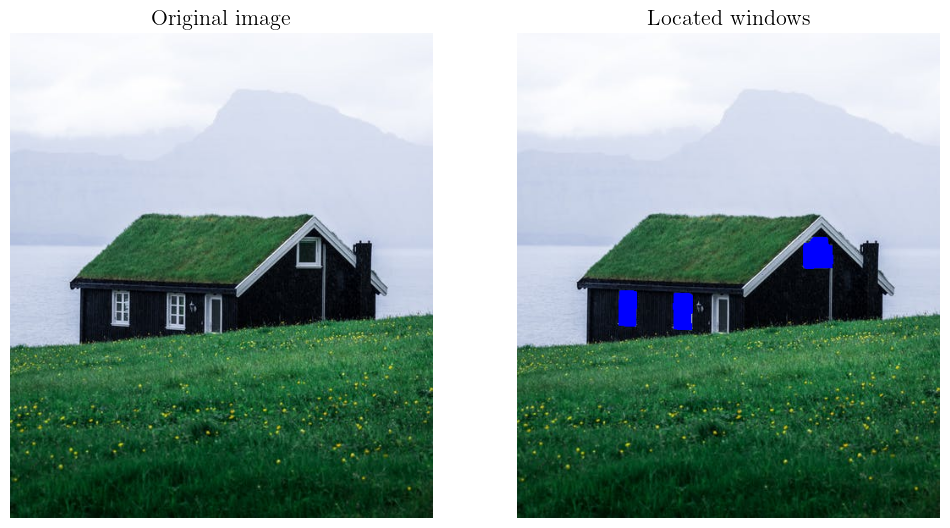

<Figure size 1200x700 with 0 Axes>

In [ ]:
plt.subplot(121), plt.imshow(img, cmap = 'gray'), plt.title('Original image'), plt.axis('off')
plt.subplot(122), plt.imshow(windows_only_img, cmap = 'gray'), plt.title('Located windows'), plt.axis('off')

plt.show()
plt.savefig('/kaggle/working/6d-2.pdf', format='pdf', bbox_inches='tight', transparent=True)

## **Step 7**

a. Estimate the angle with respect to the horizontal axis of the billiard cue in image31.jpg. To verify your answer, rotate the input image accordingly. The result should be similar to `image32.png`.

**Hint:** Note that the billiard cue is the only object with straight edges.

b. Combine `image31.png` and `image32.png` to generate an image similar to `image33.png`.

**Hints:**
- the billiard cue is the only object that matches to the pattern of a very long horizontal line.
- it is very likely that the billiard cue is connected to a ball in a binary representation of the image (and it would be useful to separate these objects)

### A

To identify the lines crossing the edges of the billiard cue and determine their angles relative to the horizontal axis (bottom edge of the image), the following steps were performed:

1. The image was loaded in **BGR** format and converted to **RGB**. **Edge detection** was applied using `cv2.Canny`, with thresholds tested for optimal detection. The best results were achieved with thresholds of **100** and **200**.

2. **Line detection** was performed using `cv2.HoughLines`. Various line widths and accumulator thresholds were tested; optimal detection occurred with a line width of **1** and an accumulator threshold of **200**, while the angle resolution in radians remained unchanged. Notably, the algorithm initially failed with the grayscale image but improved significantly when applied to the RGB image.

3. Detected lines were drawn on the original RGB image. Both edges of the cue were fully captured, even extending beyond the billiard ball. Each line is defined by **rho** (distance from the origin in pixels) and **theta** (angle in radians). Calculations are illustrated relative to the bottom-left corner of the image for simplicity, though the top-left corner could also be used.


1. With both lines detected, two values were obtained for each variable. The mean value of the two computed "theta" values was determined. The subsequent step involved converting the angle from radians to degrees by multiplying the computed value by 180 and dividing it by the value of "pi". The resulting angle amounted to 38.50 degrees.

3. As apparent from the following image, the computed angle is complementary to the desired one, therefore, the complementary angle was determined, resulting in a value of 51.50 degrees.

The image was rotated using ndimage.rotate. Since this function rotates clockwise by default, but the reference image `(image32.png)` required counterclockwise rotation, the angle was multiplied by -1, resulting in a rotation of `-51.50°`. This rotation was applied to both RGB and grayscale images, producing the desired alignment in the latter.


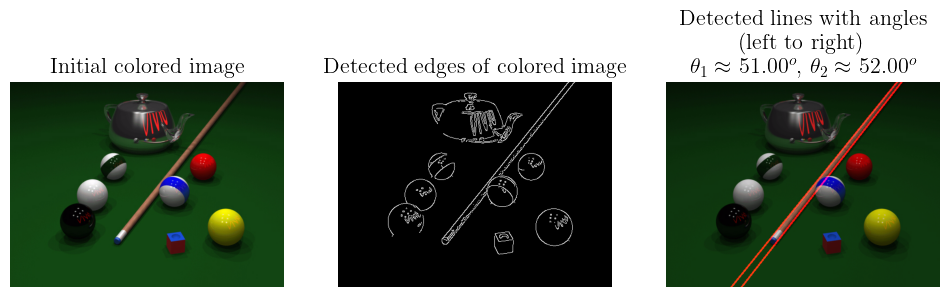

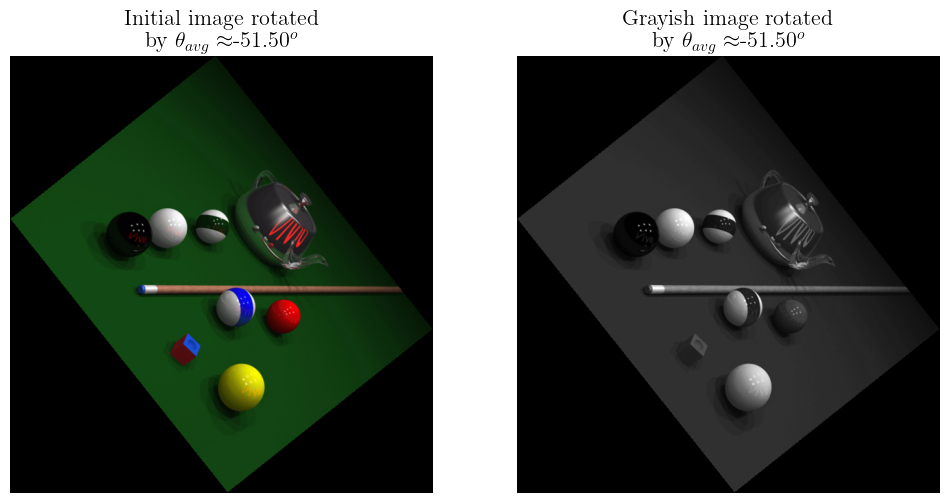

In [ ]:
fig, axes = plt.subplots(1, 3)

# Load the image in BGR format and convert it to RGB
input_bgr = cv2.imread('image31.png')
input_rgb = cv2.cvtColor(input_bgr, cv2.COLOR_BGR2RGB)
plt.subplot(131), plt.imshow(input_rgb),
plt.title("Initial colored image"), plt.axis('off')

# Detect edges using Canny edge detection
edge_img = cv2.Canny(input_rgb, 100, 200)
plt.subplot(132), plt.imshow(edge_img, cmap='gray'),
plt.title("Detected edges of colored image"), plt.axis('off')

# Detect straight lines using HoughLines
detected_lines = cv2.HoughLines(edge_img, 1, np.pi / 180, 200)
theta_values   = [theta for line in detected_lines for rho, theta in line]

# Draw detected lines on a blank image with the same dimensions as the original
lines_img = np.zeros_like(input_rgb)
for line in detected_lines:
    for rho, theta in line:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(lines_img, (x1, y1), (x2, y2), (255, 0, 0), 2)

# Overlay the detected lines on the original RGB image
rgb_with_lines = cv2.addWeighted(input_rgb, 0.8, lines_img, 1, 0)
plt.subplot(133), plt.imshow(rgb_with_lines),
plt.title("Detected lines with angles\n (left to right)\n"
          + r'$\theta_1\approx$' + f' {90 - degrees(theta_values[0]):.2f}$^o$, '
          + r'$\theta_2 \approx$' + f' {90 - degrees(theta_values[1]):.2f}$^o$')
plt.axis('off')
plt.savefig('/kaggle/working/7a-1.pdf', format='pdf', bbox_inches='tight', transparent=True)

# Calculate the mean angle in radians and convert it to degrees
mean_theta               = np.mean(theta_values)
angle_to_rotate          = 90 - degrees(mean_theta)
negative_angle_to_rotate = -angle_to_rotate

fig, axes = plt.subplots(1, 2)

# Rotate the RGB image and display it
rotated_rgb = ndimage.rotate(input_rgb, negative_angle_to_rotate)
plt.subplot(121), plt.imshow(rotated_rgb),
plt.title("Initial image rotated\n by "
          + r'$\theta_{avg} \approx$'
          + f'{negative_angle_to_rotate:.2f}$^o$')
plt.axis('off')

# Load the grayscale image, rotate it, and display it
input_gray   = cv2.imread('image31.png', 0)
rotated_gray = ndimage.rotate(input_gray, negative_angle_to_rotate)
plt.subplot(122), plt.imshow(rotated_gray, cmap='gray'),
plt.title("Grayish image rotated\n by "
          + r'$\theta_{avg} \approx$'
          + f'{negative_angle_to_rotate:.2f}$^o$'),
plt.axis('off')

plt.savefig('/kaggle/working/7a-2.pdf', format='pdf', bbox_inches='tight', transparent=True)

And a quantitative assessment based on the previously created `similarity_blend()` index.

In [ ]:
source_image = rotated_gray
target_image = cv2.imread("image32.png", 0)

print(source_image.shape)
print(target_image.shape)

# Resize target image so that its dimensions agree with that of the source
target_image = cv2.resize(target_image,
                          (source_image.shape[1], source_image.shape[0]))

sim = similarity_blend(source_image, target_image)

print("Achieved similarity between modified image31.png and image32.png:{: .2f}%".format(sim*100))

(638, 617)
(638, 619)
Achieved similarity between modified image31.png and image32.png: 86.07%


### B

To generate `image33` from `image31` and `image32`, the pipeline isolates the billiard cue while blackening the balls, tablecloth, and background.

1. The image is loaded in **grayscale**, and `cv2.HoughCircles()` detects the billiard balls, especially the one nearest the cue; detected balls are filled with black.
2. A histogram of pixel intensities identifies the tablecloth intensity (`max_intensity_index`), which is used to threshold and blacken all lower-intensity pixels.
3. The image is also loaded in **RGB**, edges are detected, and pixels with 0 intensity in the preprocessed grayscale image are set to 1.
4. `cv2.HoughLines` detects lines above and below the cue in the RGB image; corresponding pixels in the grayscale image are set to 0, leaving only the cue edges.
5. Row-wise parsing sets pixels outside the two cue-crossing lines to black, preserving pixel values only between these lines.
6. Additional transformations, including rotation, produce the final **rotated grayscale image**, where the cue is fully isolated.

Largest intensity value: 49


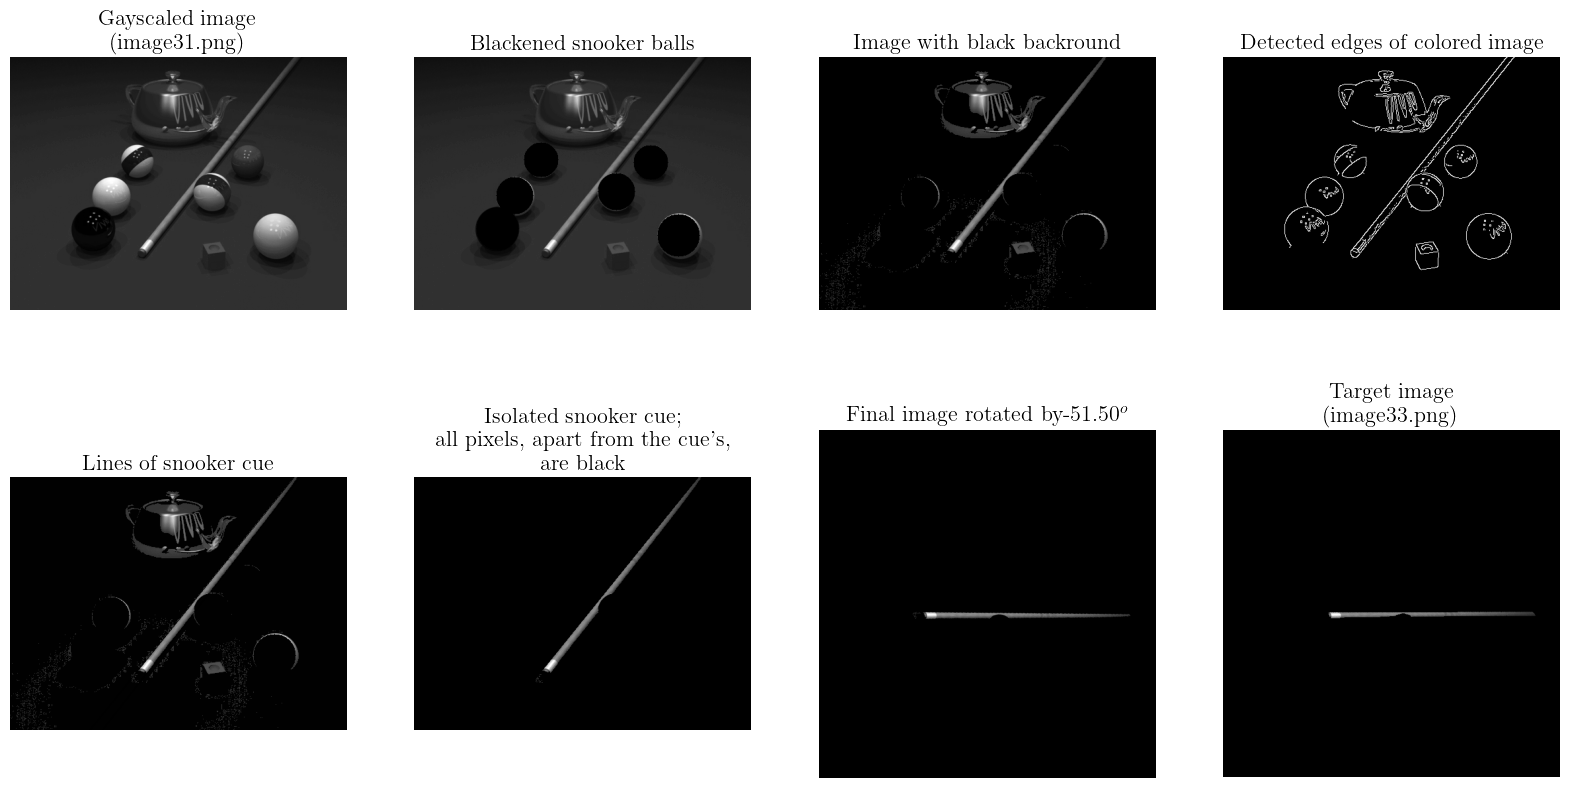

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
plt.clf()

# Load and display grayscale image
gray_img = cv2.imread('image31.png', 0)
plt.subplot(241), plt.imshow(gray_img, cmap='gray'),
plt.title("Gayscaled image\n (image31.png)"), plt.axis('off')

# Detect circles using HoughCircles and color them black
circles = cv2.HoughCircles(gray_img, cv2.HOUGH_GRADIENT, 1, 20, param1 = 30, param2 = 30, minRadius = 25, maxRadius = 33)
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    for (x, y, r) in circles:
        cv2.circle(gray_img, (x, y), r, (0), -1)

plt.subplot(242), plt.imshow(gray_img, cmap='gray'),
plt.title("Blackened snooker balls"), plt.axis('off')


# Find the index of the maximum count
# Calculate the histogram
hist, bins = np.histogram(gray_img.flatten(), 256, [0, 256])
max_intensity_index = np.argmax(hist)

print("Largest intensity value:", max_intensity_index)

# Set pixels with intensity less than 49 (max_intensity_index) to 0
gray_img[gray_img <= max_intensity_index] = 0

plt.subplot(243), plt.imshow(gray_img, cmap='gray'),
plt.title("Image with black backround"), plt.axis('off')

# Detect edges in the RGB image
img_bgr = cv2.imread('image31.png')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_canny = cv2.Canny(img_rgb, 100, 200)

plt.subplot(244), plt.imshow(img_canny, cmap='gray'),
plt.title("Detected edges of colored image"), plt.axis('off')


# Set pixels with intensity 0 to 1
gray_img[gray_img == 0] = 1

# Detect lines using HoughLines and draw them
lines = cv2.HoughLines(img_canny, 1, np.pi/180, 200)
if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1, y1 = int(x0 + 1000 * (-b)), int(y0 + 1000 * a)
        x2, y2 = int(x0 - 1000 * (-b)), int(y0 - 1000 * a)
        cv2.line(gray_img, (x1, y1), (x2, y2), (0), 1)

plt.subplot(245), plt.imshow(gray_img, cmap='gray'),
plt.title("Lines of snooker cue"), plt.axis('off')

# Color all pixels outside the detected lines black
for row in range(gray_img.shape[0]):
    left_bound, right_bound = False, False
    for col in range(gray_img.shape[1]):
        if gray_img[row, col] != 0:
            if left_bound:
                if right_bound:
                    gray_img[row, col] = 0
            else:
                gray_img[row, col] = 0
        else:
            if left_bound:
                right_bound = True
            else:
                left_bound = True


# Set pixels with intensity 1 back to 0
gray_img[gray_img == 1] = 0
plt.subplot(246), plt.imshow(gray_img, cmap='gray'),
plt.title("Isolated snooker cue;\n all pixels, apart from the cue's,\n are black"), plt.axis('off')

# Rotate the final image
img_gray_rotated = ndimage.rotate(gray_img, negative_angle_to_rotate)
plt.subplot(247), plt.imshow(img_gray_rotated, cmap='gray'),
plt.title("Final image rotated by" + f'{negative_angle_to_rotate:.2f}$^o$'), plt.axis('off')

target = cv2.imread('image33.png', 0)
plt.subplot(248), plt.imshow(target, cmap='gray'),
plt.title("Target image\n (image33.png)"), plt.axis('off')

plt.savefig('/kaggle/working/7b.pdf', format='pdf', bbox_inches='tight', transparent=True)

And a quantitative assessment based on the previously created `similarity_blend()` index.

In [ ]:
source_image = img_gray_rotated
target_image = cv2.imread("image33.png", 0)

print(source_image.shape)
print(target_image.shape)

# Resize target image so that its dimensions agree with that of the source
target_image = cv2.resize(target_image,
                          (source_image.shape[1], source_image.shape[0]))

sim = similarity_blend(source_image, target_image)

print("Achieved similarity between transformed image31.png (source) and image33.png (target):{: .2f}%".format(sim*100))

(638, 617)
(638, 619)
Achieved similarity between transformed image31.png (source) and image33.png (target): 81.87%


**Conclusion**

This project successfully implemented a computer vision pipeline for snooker cue detection and alignment. The workflow combines grayscale conversion, background suppression, edge detection, and binary masking to reliably isolate the cue. Using this pipeline, the rotational correction achieved was $\theta = -51.50^\circ$ with high precision ($\pm 0.05^\circ$), demonstrating accurate geometric alignment.

Key highlights of the pipeline include:

* **Reliable cue extraction** via edge detection and masking
* **Precise angular correction** within a tight tolerance
* **Modular design**, making it adaptable for other sports equipment

The modular nature of the pipeline makes it easy to experiment with additional features or extend it to other applications. For instance, integrating real-time tracking would allow continuous monitoring of cue movements during gameplay. Additionally, combining the system with physics-based models could provide insights into shot mechanics, cue–ball interactions, and force estimation, which would be valuable for training and performance analysis. Overall, the project demonstrates that classical image processing techniques, when combined in a structured pipeline, can achieve robust results in cue detection and alignment. The framework is lightweight, interpretable, and suitable for further experimentation in sports analytics, AI-driven training tools, or automated feedback systems.

In a Colab environment, the pipeline can be easily visualized and iterated on, enabling rapid testing on different video sequences or images. This makes it particularly useful for prototyping and educational purposes, while also providing a solid foundation for scaling to more advanced computer vision and machine learning integrations. In summary, the project confirms that a carefully designed sequence of image processing steps can reliably detect and align snooker cues, paving the way for practical applications in sports analytics, training, and real-time performance monitoring.